In [1]:
import numpy as np
import pandas as pd
import matplotlib 
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('kc_house_data.csv')

In [3]:
train.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
print(train.describe(include='all'))
print('Number of Observations :',train.shape[0])
print('Number of Features :',train.shape[1])
print('Number of Numerical Features :',train.dtypes[train.dtypes!=object].size)
print('Number of Categorial Features :',train.dtypes[train.dtypes==object].size)

                  id             date         price      bedrooms  \
count   2.161300e+04            21613  2.161300e+04  21613.000000   
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.400881e+05      3.370842   
std     2.876566e+09              NaN  3.671272e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
unique     

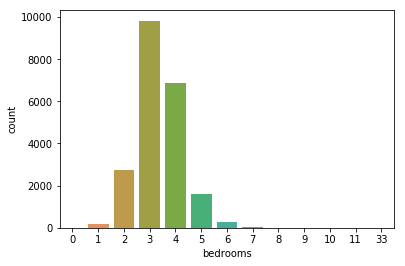

In [6]:
plt.figure()
sns.countplot(x='bedrooms',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

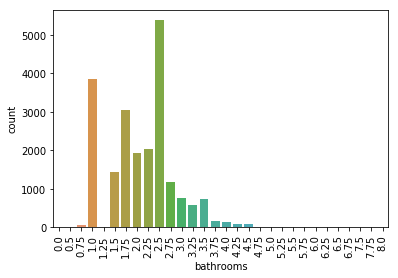

In [7]:
plt.figure()
sns.countplot(x='bathrooms',data=train)
plt.xticks(rotation=90)

Mean : 7.640074967817103
Min : 5.66988092298052
Max : 9.513403546466266
Std : 6.822654420570402


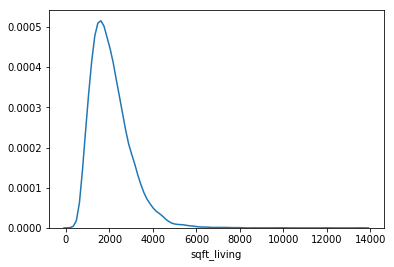

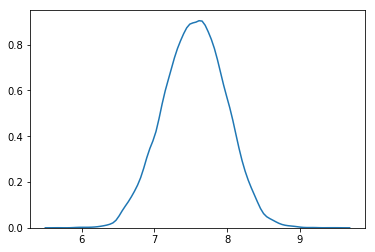

In [8]:
plt.figure()
sns.distplot(train['sqft_living'],hist=False)
plt.figure()
sns.distplot(np.log(np.array(train['sqft_living'])),hist=False)
print("Mean :",np.log(np.array(train['sqft_living']).mean()))
print("Min :",np.log(np.array(train['sqft_living']).min()))
print("Max :",np.log(np.array(train['sqft_living']).max()))
print("Std :",np.log(np.array(train['sqft_living']).std()))

Mean : 9.622911344577554
Min : 6.253828811575473
Max : 14.3171091432381
Std : 10.631508349585467


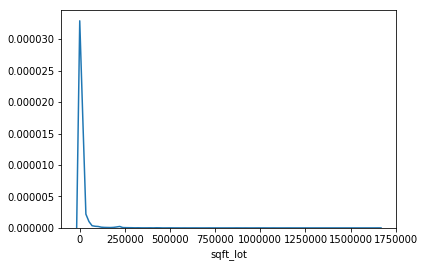

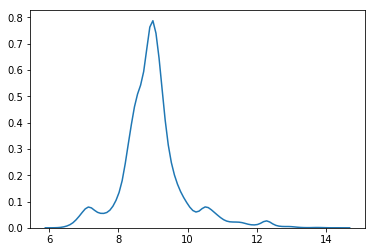

In [9]:
plt.figure()
sns.distplot(train['sqft_lot'],hist=False)
plt.figure()
sns.distplot(np.log(np.array(train['sqft_lot'])),hist=False)
print("Mean :",np.log(np.array(train['sqft_lot']).mean()))
print("Min :",np.log(np.array(train['sqft_lot']).min()))
print("Max :",np.log(np.array(train['sqft_lot']).max()))
print("Std :",np.log(np.array(train['sqft_lot']).std()))

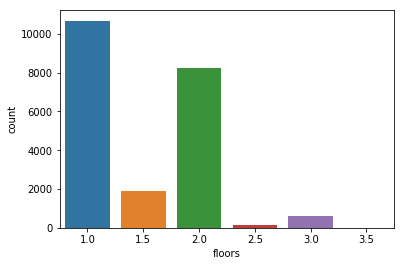

In [10]:
plt.figure()
sns.countplot(x='floors',data=train)

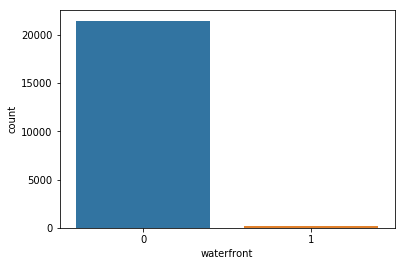

In [11]:
plt.figure()
sns.countplot(x='waterfront',data=train)

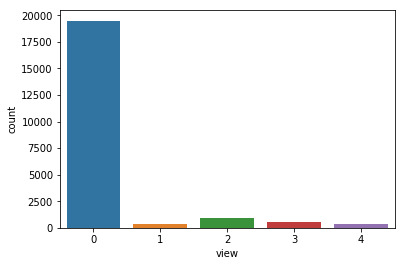

In [12]:
plt.figure()
sns.countplot(x='view',data=train)

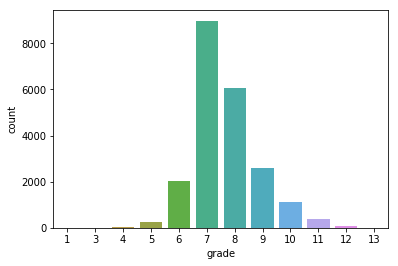

In [13]:
plt.figure()
sns.countplot(x='grade',data=train)

Mean : 7.489071439016347
Min : 5.66988092298052
Max : 9.149528232579426
Std : 6.719099889980514


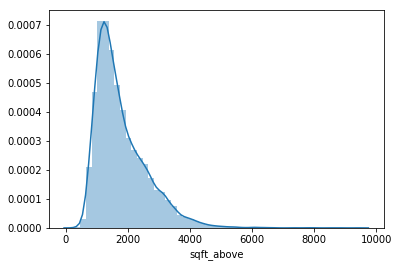

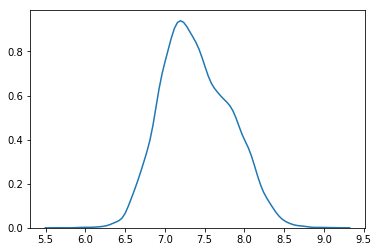

In [14]:
plt.figure()
sns.distplot(train['sqft_above'])
plt.figure()
sns.distplot(np.log(np.array(train['sqft_above'])),hist=False)
print("Mean :",np.log(np.array(train['sqft_above']).mean()))
print("Min :",np.log(np.array(train['sqft_above']).min()))
print("Max :",np.log(np.array(train['sqft_above']).max()))
print("Std :",np.log(np.array(train['sqft_above']).std()))

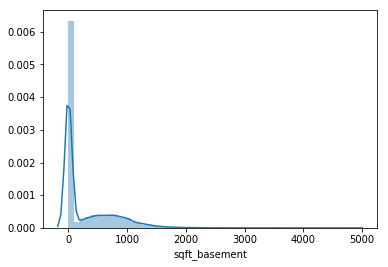

In [15]:
plt.figure()
sns.distplot(train['sqft_basement'])

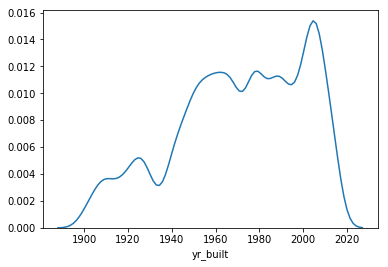

In [16]:
plt.figure()
sns.distplot(train['yr_built'],hist=False)


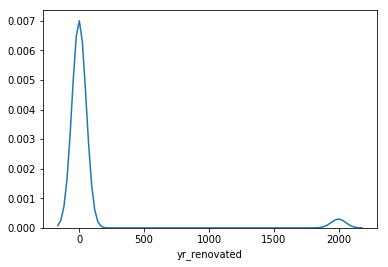

In [17]:
plt.figure()
sns.distplot(train['yr_renovated'],hist=False)

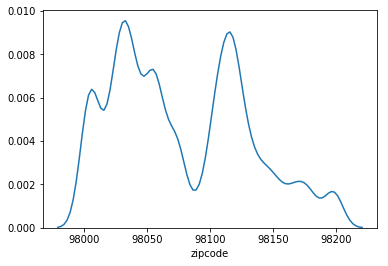

In [18]:
plt.figure()
sns.distplot(train['zipcode'],hist=False)

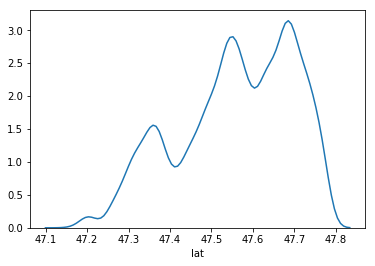

In [19]:
plt.figure()
sns.distplot(train['lat'],hist=False)

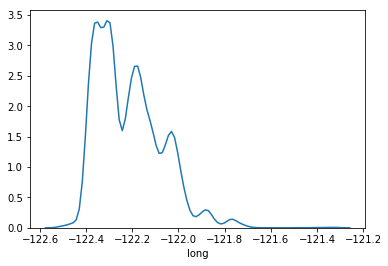

In [20]:
plt.figure()
sns.distplot(train['long'],hist=False)

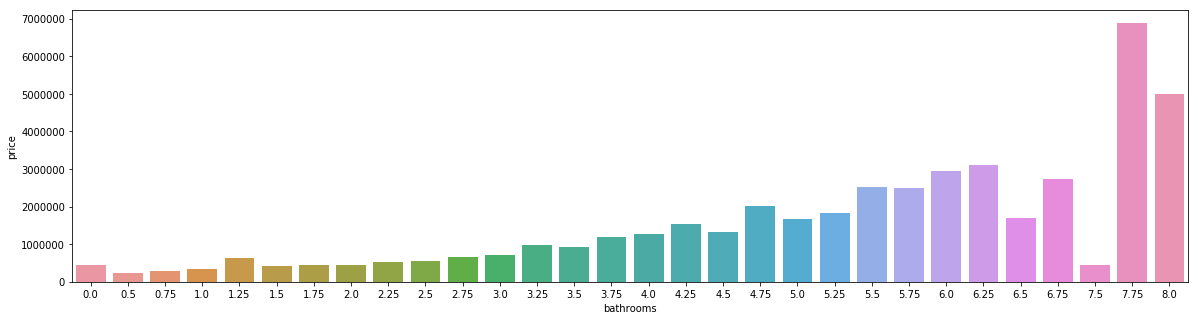

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(x="bathrooms",y="price",data=train.groupby('bathrooms').mean().reset_index())

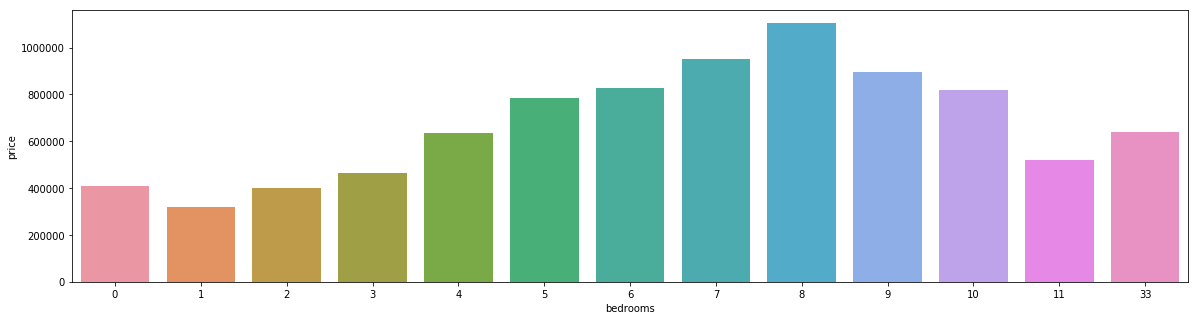

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(x="bedrooms",y="price",data=train.groupby('bedrooms').mean().reset_index())

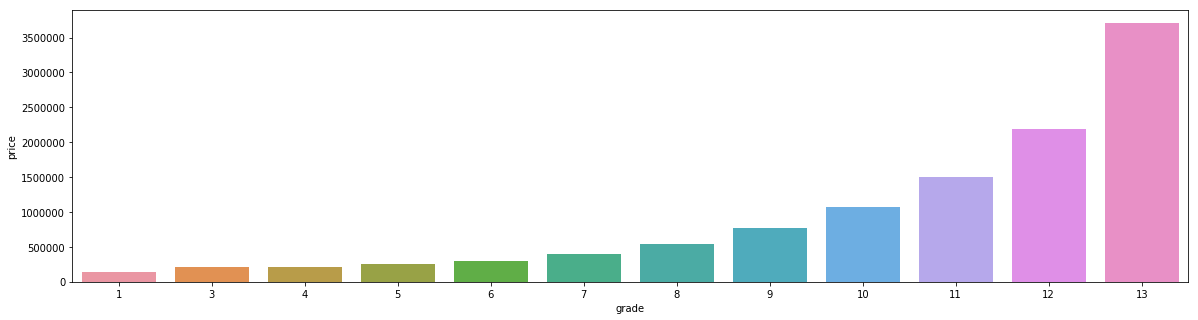

In [23]:
plt.figure(figsize=(20,5))
sns.barplot(x="grade",y="price",data=train.groupby('grade').mean().reset_index())

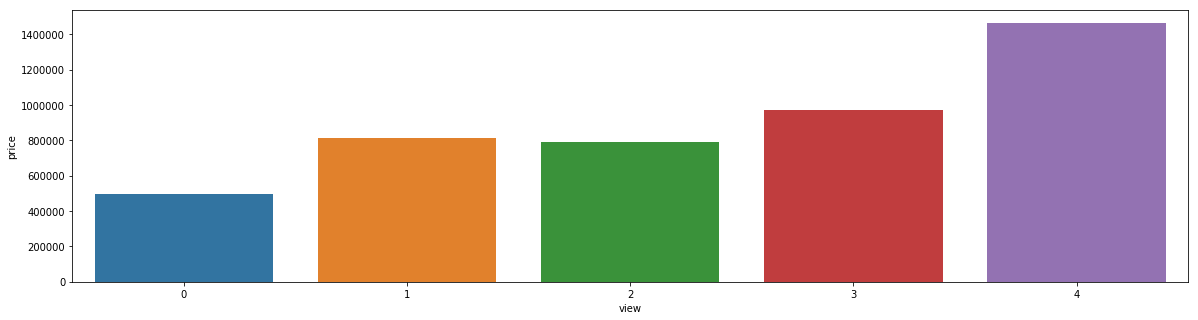

In [24]:
plt.figure(figsize=(20,5))
sns.barplot(x="view",y="price",data=train.groupby('view').mean().reset_index())

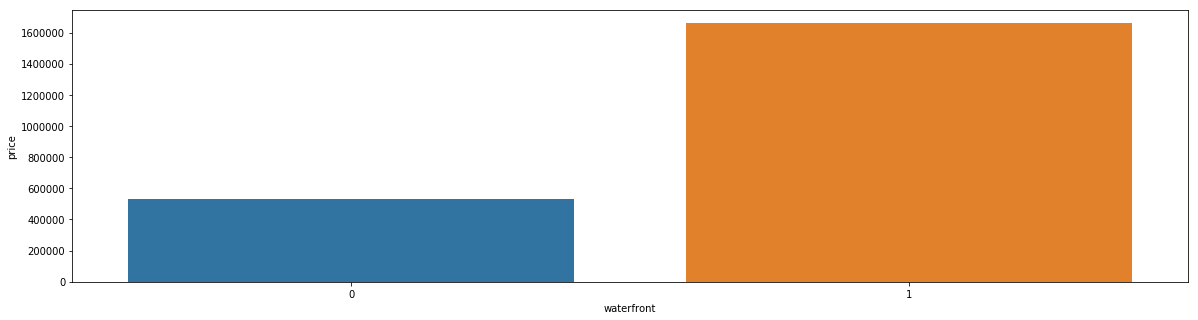

In [25]:
plt.figure(figsize=(20,5))
sns.barplot(x="waterfront",y="price",data=train.groupby('waterfront').mean().reset_index())

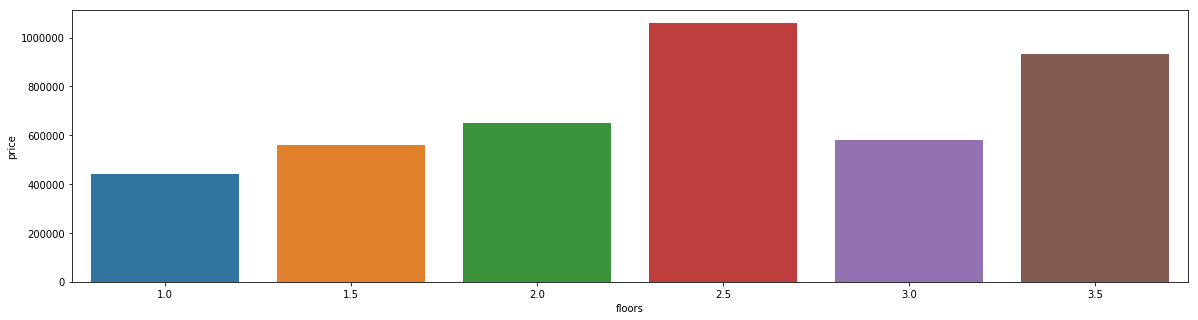

In [26]:
plt.figure(figsize=(20,5))
sns.barplot(x="floors",y="price",data=train.groupby('floors').mean().reset_index())

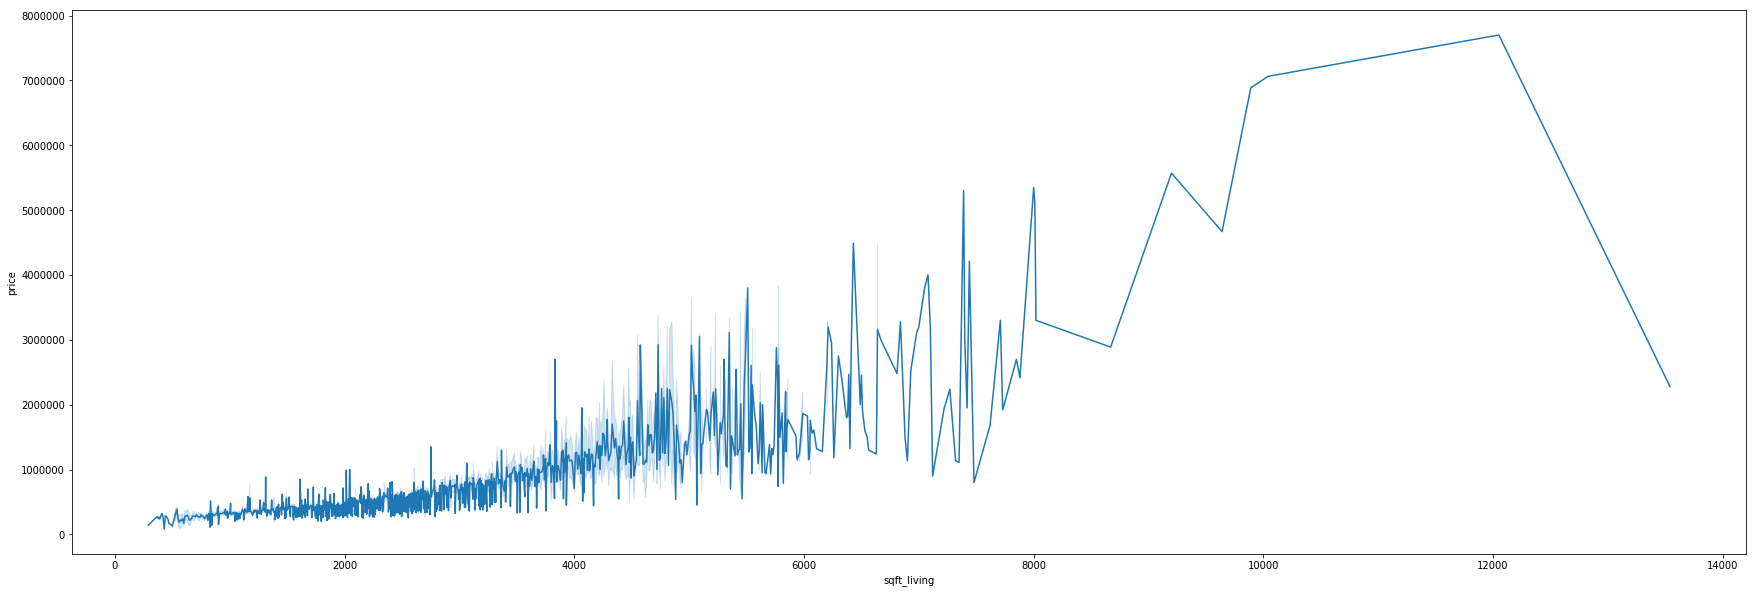

In [27]:
plt.figure(figsize=(30,10))
sns.lineplot(x="sqft_living",y="price",data=train)

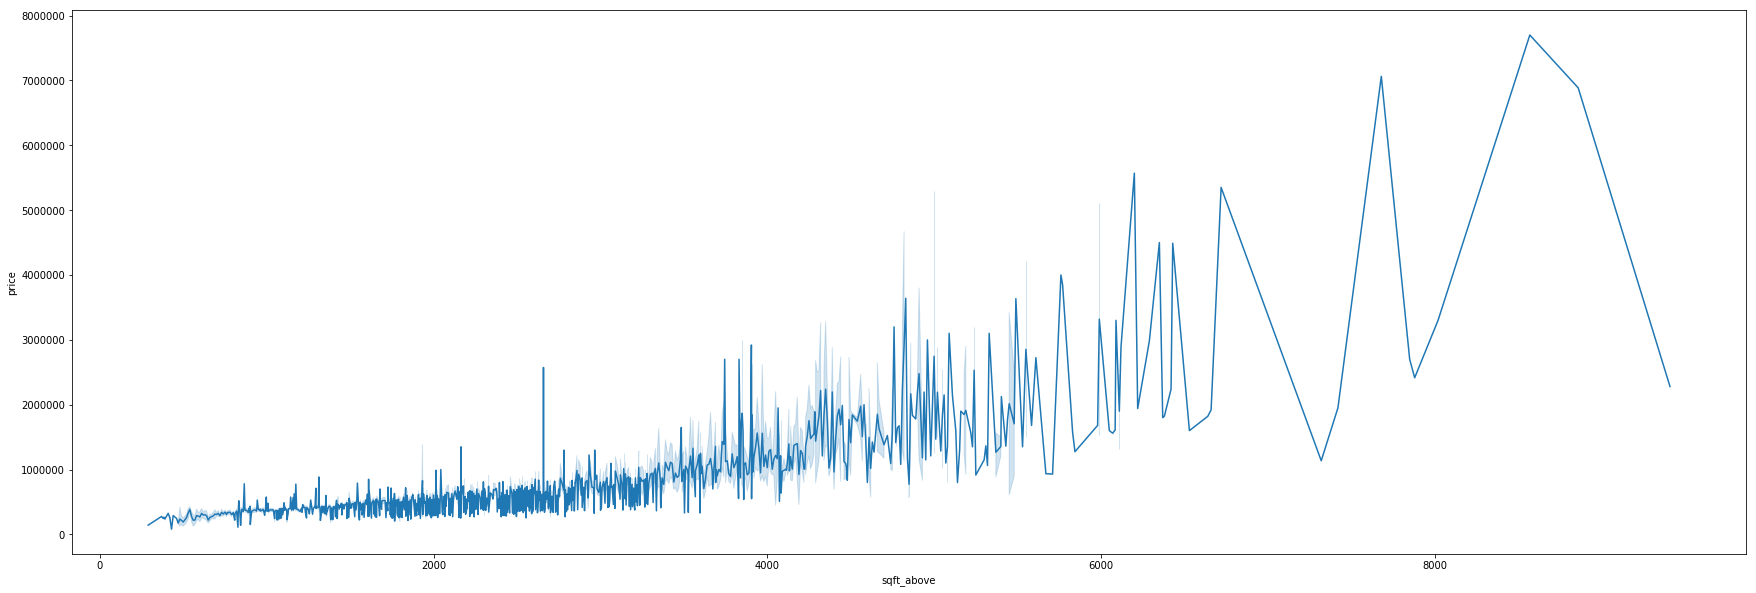

In [28]:
plt.figure(figsize=(30,10))
sns.lineplot(x="sqft_above",y="price",data=train)

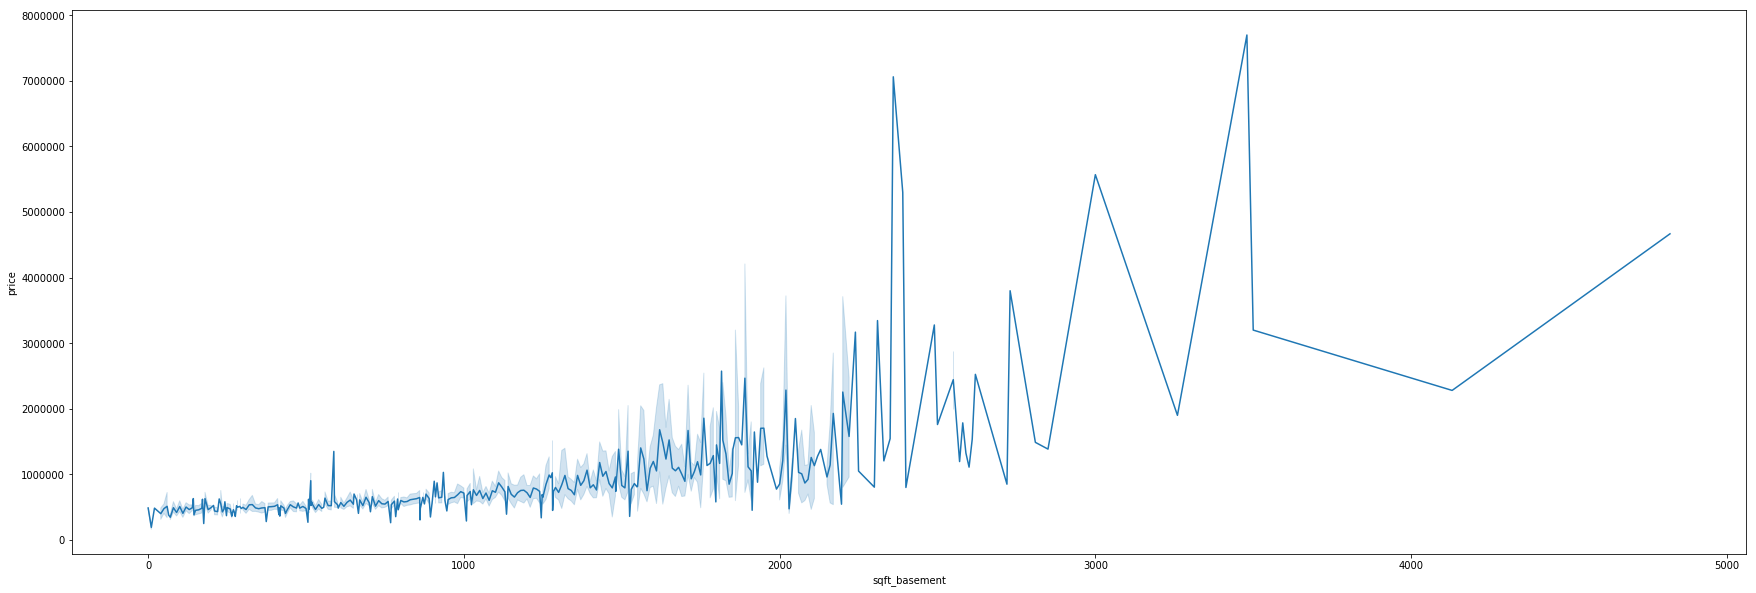

In [29]:
plt.figure(figsize=(30,10))
sns.lineplot(x="sqft_basement",y="price",data=train)

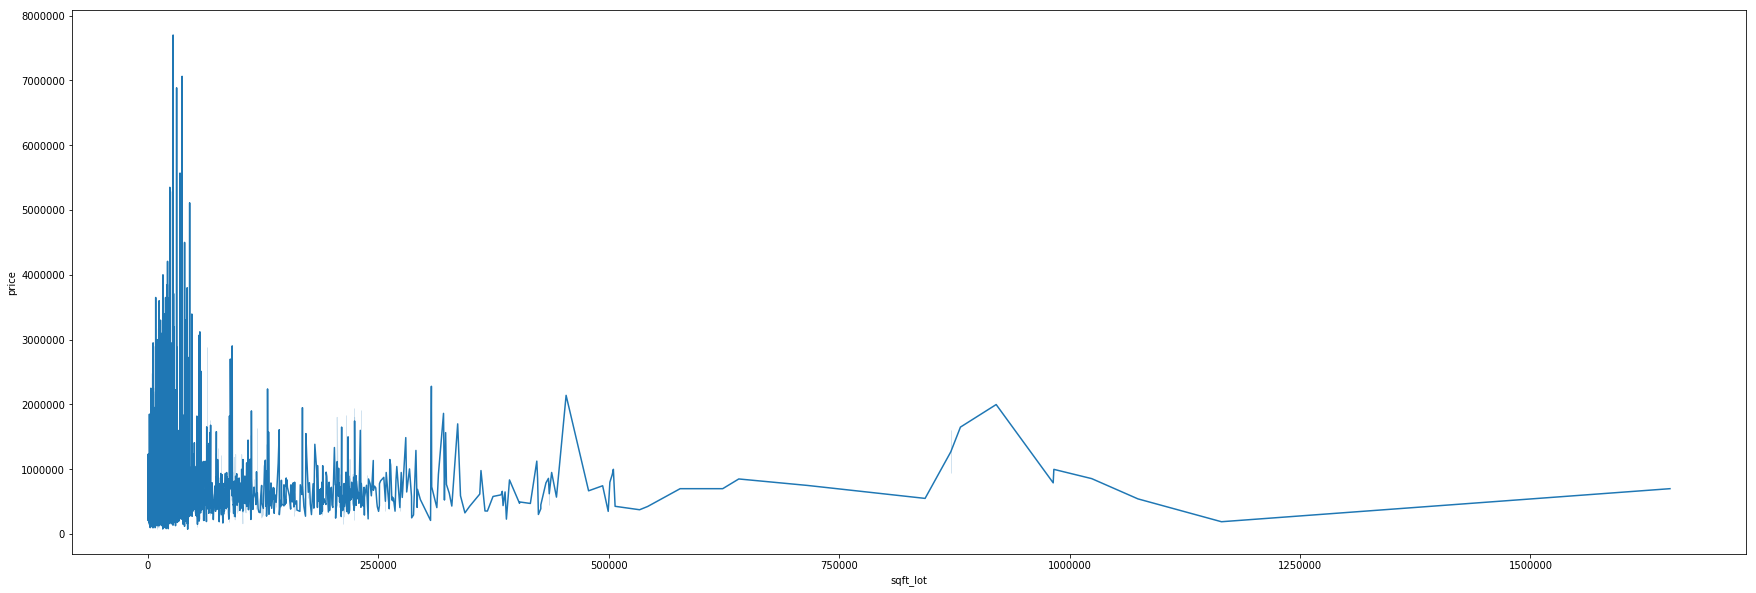

In [30]:
plt.figure(figsize=(30,10))
sns.lineplot(x="sqft_lot",y="price",data=train)

In [31]:
train['yr_built'].unique().size

116

In [32]:
train['yr_built'].describe(include='all')

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

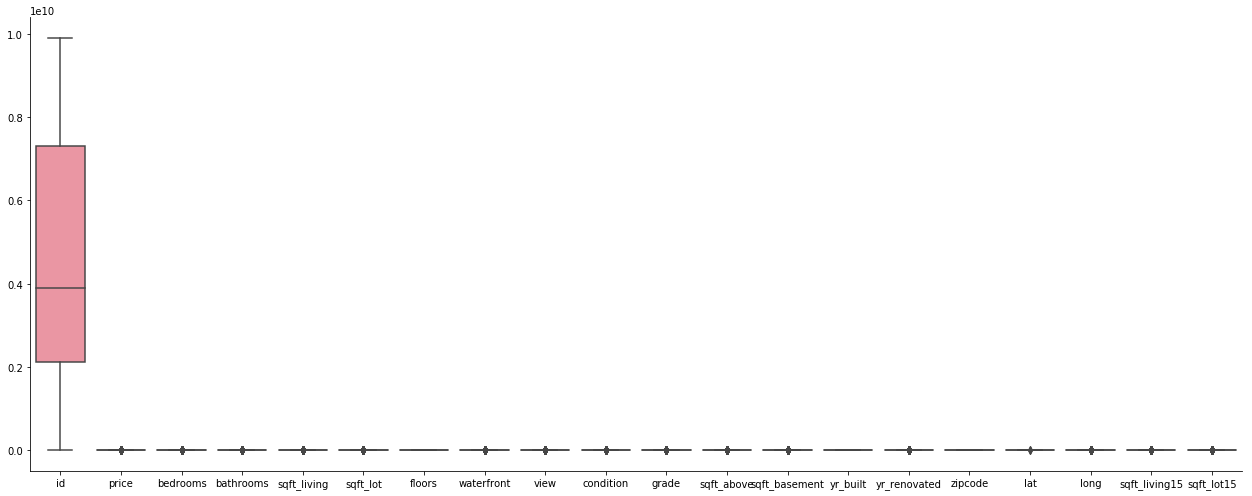

In [33]:
sns.catplot(data=train , kind='box' , height=7, aspect=2.5)
plt.show()

In [34]:
def encode_year(data):
    if int(data) >=1900 and int(data)<=1950:
        return 1
    elif int(data) >= 1951 and int(data) <=2000:
        return 2
    else:
        return 3
    
train['yr_built']=train['yr_built'].apply(encode_year)

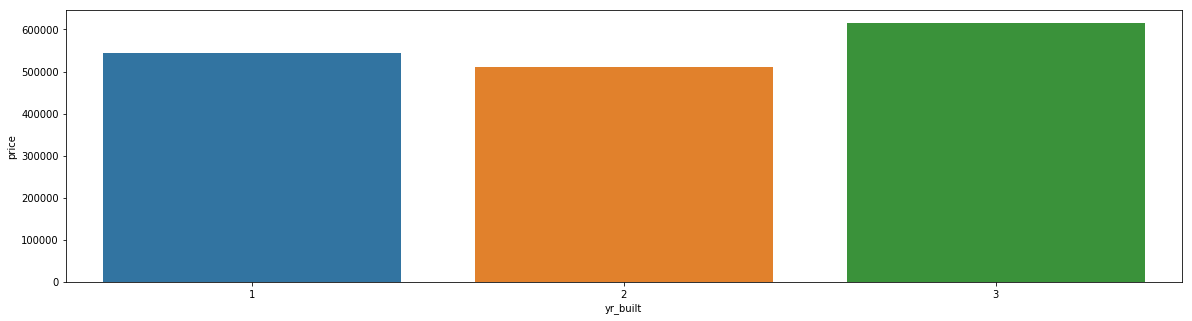

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(x="yr_built",y="price",data=train.groupby('yr_built').mean().reset_index())

In [36]:
train.drop('yr_renovated',axis=1,inplace=True)

In [37]:
train.drop(['id','date'],axis=1,inplace=True)

In [38]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,2,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,2,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,2,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,2,98074,47.6168,-122.045,1800,7503


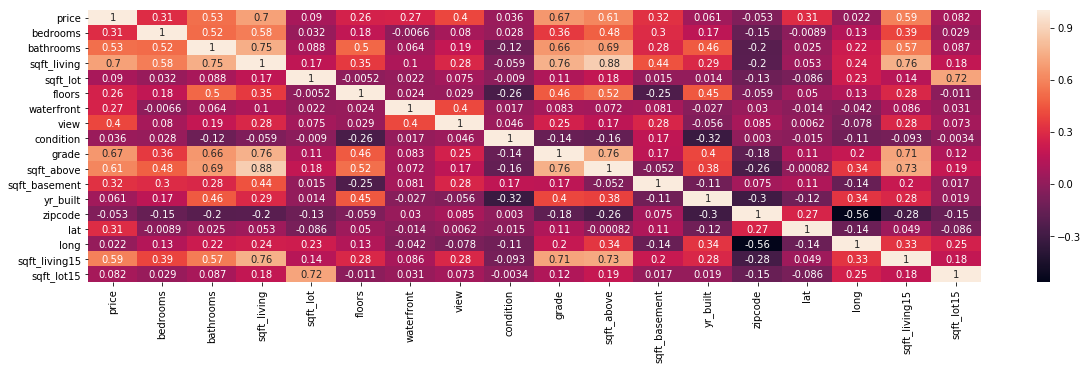

In [39]:
plt.figure(figsize=(20,5))
sns.heatmap(train.corr(),annot=True)

In [40]:
from math import log10
__base32 = '0123456789bcdefghjkmnpqrstuvwxyz'
def geohashEncode(latitude, longitude, precision=12):
    """
    Encode a position given in float arguments latitude, longitude to
    a geohash which will have the character count precision.
    """
    lat_interval, lon_interval = (-90.0, 90.0), (-180.0, 180.0)
    geohash = []
    bits = [ 16, 8, 4, 2, 1 ]
    bit = 0
    ch = 0
    even = True
    while len(geohash) < precision:
        if even:
            mid = (lon_interval[0] + lon_interval[1]) / 2
            if longitude > mid:
                ch |= bits[bit]
                lon_interval = (mid, lon_interval[1])
            else:
                lon_interval = (lon_interval[0], mid)
        else:
            mid = (lat_interval[0] + lat_interval[1]) / 2
            if latitude > mid:
                ch |= bits[bit]
                lat_interval = (mid, lat_interval[1])
            else:
                lat_interval = (lat_interval[0], mid)
        even = not even
        if bit < 4:
            bit += 1
        else:
            geohash += __base32[ch]
            bit = 0
            ch = 0
    return ''.join(geohash)

In [41]:
train['geohash']=train.apply(lambda points: geohashEncode(points.lat, points.long,precision=4),axis = 1)


In [42]:
train['pricepersqft']=train['price']/train['sqft_living']
train=train.join(train.groupby(['geohash'])['pricepersqft'].mean(),on='geohash',rsuffix='priceaverage600m')
train=train.join(train.groupby(['geohash'])['pricepersqft'].min(),on='geohash',rsuffix='pricemin600m')
train=train.join(train.groupby(['geohash'])['pricepersqft'].max(),on='geohash',rsuffix='pricemax600m')

train=train.join(train.groupby(['geohash'])['pricepersqft'].max(),on='geohash',rsuffix='pricemax600m')

In [43]:
train.drop(['geohash'],axis=1,inplace=True)

In [44]:
Y=train['price']
train.drop('price',axis=1,inplace=True)

X=train[['sqft_living','grade','waterfront','sqft_lot','sqft_above','view','bathrooms','bedrooms','pricepersqftpriceaverage600m','pricepersqftpricemin600m','pricepersqftpricemax600m','pricepersqftpricemax600m']]
X

,sqft_living,grade,waterfront,sqft_lot,sqft_above,view,bathrooms,bedrooms,pricepersqftpriceaverage600m,pricepersqftpricemin600m,pricepersqftpricemax600m,pricepersqftpricemax600m,pricepersqftpricemax600m,pricepersqftpricemax600m
0,1180,7,0,5650,1180,0,1.00,3,282.397131,87.647059,800.000000,800.000000,800.000000,800.000000
1,2570,7,0,7242,2170,0,2.25,3,295.425310,90.750825,798.122066,798.122066,798.122066,798.122066
2,770,6,0,10000,770,0,1.00,2,295.425310,90.750825,798.122066,798.122066,798.122066,798.122066
3,1960,7,0,5000,1050,0,3.00,4,300.514370,89.700855,792.682927,792.682927,792.682927,792.682927
4,1680,8,0,8080,1680,0,2.00,3,282.397131,87.647059,800.000000,800.000000,800.000000,800.000000
5,5420,11,0,101930,3890,0,4.50,4,295.425310,90.750825,798.122066,798.122066,798.122066,798.122066
6,1715,7,0,6819,1715,0,2.25,3,166.467643,87.588235,791.666667,791.666667,791.666667,791.666667
7,1060,7,0,9711,1060,0,1.50,3,166.467643,87.588235,791.666667,791.666667,791.666667,791.666667
8,1780,7,0,7470,1050,0,1.00,3,282.397131,87.647059,800.000000,800.000000,800.000000,800.000000
9,1890,7,0,6560,1890,0,2.50,3,166.467643,87.588235,791.666667,791.666667,791.666667,791.666667


In [45]:
def r2_score(Y,Yhat):
    d1=Y-Yhat
    d2=Y-Y.mean()
    r2=1-d1.dot(d1)/d2.dot(d2)
    return r2

In [46]:
def apply_log(data):
    return np.log(data)

In [47]:
# X['sqft_living']=X['sqft_living'].apply(apply_log)
# X['sqft_lot']=X['sqft_lot'].apply(apply_log)
# X['sqft_above']=X['sqft_above'].apply(apply_log)

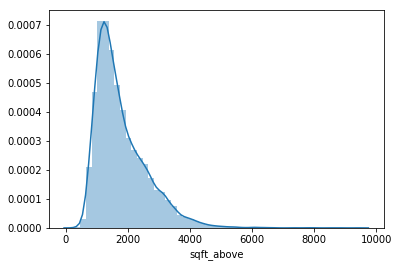

In [48]:
sns.distplot(X['sqft_above'])

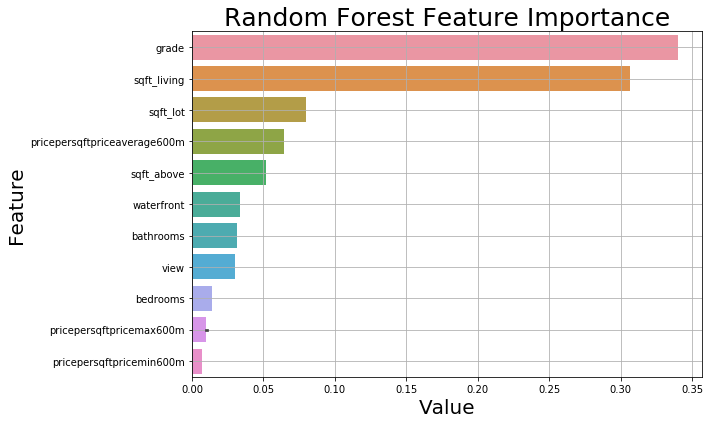

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
rf_model.fit(X,Y)
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.xlabel('Value',fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.title('Random Forest Feature Importance',fontsize=25)
plt.grid()
plt.ioff()
plt.tight_layout()

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y,test_size = 0.20)

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_val=sc_X.transform(x_val)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regressor=LinearRegression()
regressor.fit(x_train,y_train)
prediction=regressor.predict(x_val)
print(r2_score(y_val,prediction))
print(regressor.score(x_val,y_val))
accu1 = cross_val_score(regressor,x_val,y_val,cv=5)

0.683660730757504
0.6836607307575042


In [70]:
from sklearn.linear_model import (Ridge, Lasso, RandomizedLasso)

In [54]:
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
print(np.abs(rlasso.scores_))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Memory is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warni

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this func

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this func

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this func

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this func

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this func

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this func

[1.    1.    1.    0.99  0.985 1.    0.99  1.    1.    1.    0.45  0.29
 0.145 0.105]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

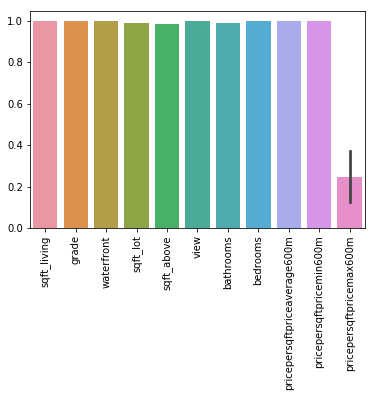

In [55]:
plt.figure()
sns.barplot(x=X.columns,y=rlasso.scores_)
plt.xticks(rotation=90)

In [56]:
X.drop(['pricepersqftpricemax600m'],axis=1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
from sklearn.feature_selection import RFE, f_regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
rfe = RFE(lr, n_features_to_select=1, verbose =3)
rfe.fit(X,Y)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
  n_features_to_select=1, step=1, verbose=3)

In [58]:
rfe.ranking_

array([ 8,  2,  1, 10,  9,  3,  4,  5,  7,  6])

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
prediction=regressor.predict(x_val)
print(r2_score(y_val,prediction))
print(rf.feature_importances_);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50
building tree 4 of 50


building tree 5 of 50
building tree 6 of 50building tree 7 of 50
building tree 8 of 50

building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s


building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
0.683660730757504
[0.29441794 0.35069196 0.03599766 0.08291227 0.05334382 0.02905043
 0.03212907 0.01435047 0.09591209 0.0111943 ]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


In [67]:
complex_model_R = Ridge(alpha=0.001)
complex_model_R.fit(x_train,y_train)
prediction=complex_model_R.predict(x_val)
print(r2_score(y_val,prediction))
print(complex_model_R.score(x_val,y_val))
accu1 = cross_val_score(complex_model_R,x_val,y_val,cv=5)

0.6836606684480722
0.6836606684480723


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.01006e-16): result may not be accurate.
  overwrite_a=True).T


In [85]:
from sklearn.preprocessing import PolynomialFeatures
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(x_train)
X_testpoly = polyfeat.fit_transform(x_val)

In [86]:
regressor=LinearRegression()
regressor.fit(X_trainpoly,y_train)
prediction=regressor.predict(X_testpoly)
print(r2_score(y_val,prediction))
print(regressor.score(X_testpoly,y_val))
print(cross_val_score(regressor,X_testpoly,y_val,cv=5))

0.7459800061400714
0.7459800061400714
[0.67675212 0.72299303 0.71930594 0.76891835 0.69747523]


In [76]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(x_train,y_train)
pred = knnreg.predict(x_val)
print(r2_score(y_val,pred))

0.530666381778625
